# Statistics

## Convert Json files to CSV

In [4]:
NOTEBOOK_SUMMARIES = '../data/notebook/Github/preprocessed_content/notebooks_summaries'
STATISTICS_FILE = './statistics/content_statistics.csv'

In [2]:
import json
import csv
import os

# Path to the directory containing the JSON files
dir_path = NOTEBOOK_SUMMARIES

# Path to the output CSV file
csv_path = STATISTICS_FILE

# List of field names to include in the output CSV file
fields_to_include = ['docid', 'language', 'num_cells', 'num_code_cells', 'num_md_cells', 'len_md_text']

# List to store selected fields from the JSON objects
selected_fields_list = []

# Loop through all the JSON files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.json'):
        file_path = os.path.join(dir_path, filename)
        with open(file_path, 'r') as f:
            # Load JSON object from file
            json_object = json.load(f)
            # Select only desired fields
            selected_fields = {field: json_object[field] for field in fields_to_include}
            # Append selected fields to the list
            selected_fields_list.append(selected_fields)

# Open CSV file for writing
with open(csv_path, 'w', newline='') as f:
    # Create CSV writer
    writer = csv.DictWriter(f, fieldnames=fields_to_include)
    # Write header row
    writer.writeheader()
    # Write rows for each selected fields
    for selected_fields in selected_fields_list:
        writer.writerow(selected_fields)


## Plot statistics

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_notebooks = pd.read_csv(STATISTICS_FILE)
df_notebooks.head()

,docid,language,num_cells,num_code_cells,num_md_cells,len_md_text
0,NB_26e572f53351c1221071f9eddc4e8ceb8c91a3c9be6...,python,48,21,27,57
1,NB_ee98d68f2e949cd6e9ab74a1163fbb312ab55c1180b...,python,8,8,0,0
2,NB_78859b9a27cc21e59842f22c3829697e63d170923f7...,python,6,5,1,1
3,NB_93cd29a2acda3cfbb267b05174fea04f6aca5f6f05c...,python,44,22,22,176
4,NB_6e96074e16f7f32a1e08825ab2ad3aeb380a4e2582a...,python,8,8,0,0


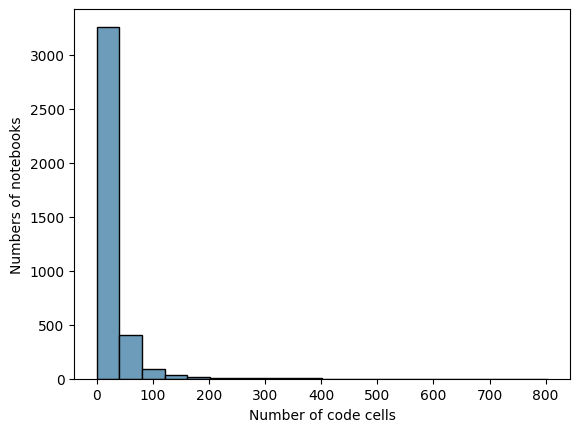

In [8]:
# df_notebooks.num_code_cells
plt.hist(df_notebooks.num_code_cells, color = "#6c9cba", edgecolor = "black", bins = 20)
plt.xlabel("Number of code cells") 
plt.ylabel("Numbers of notebooks")
plt.show()

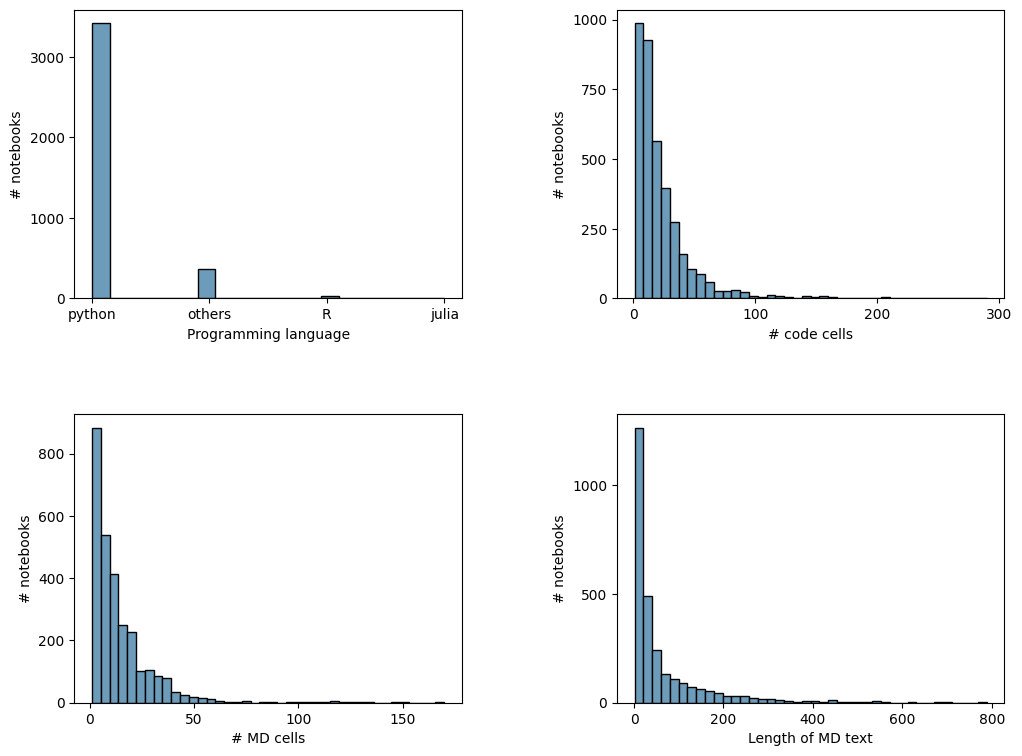

In [9]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(9)
fig.set_figwidth(12)
plt.rcParams['font.size'] = 18
plt.subplots_adjust(wspace=0.4, hspace=0.4)


# Filter data to exclude outliers
axs[0, 0].hist(df_notebooks.language, color = "#6c9cba", edgecolor = "black", bins = 20)
axs[0, 0].set(xlabel = 'Programming language', ylabel = "# notebooks")


lower, upper = 0, 300
data_filtered = df_notebooks[(df_notebooks['num_code_cells'] > lower) & (df_notebooks['num_code_cells'] < upper)]
axs[0, 1].hist(data_filtered.num_code_cells, color = "#6c9cba", edgecolor = "black", bins = 40)
axs[0, 1].set(xlabel = '# code cells', ylabel = "# notebooks")

lower, upper = 0, 200
data_filtered = df_notebooks[(df_notebooks['num_md_cells'] > lower) & (df_notebooks['num_md_cells'] < upper)]
axs[1, 0].hist(data_filtered.num_md_cells, color = "#6c9cba", edgecolor = "black", bins = 40)
axs[1, 0].set(xlabel = '# MD cells', ylabel = "# notebooks")

lower, upper = 0, 800
data_filtered = df_notebooks[(df_notebooks['len_md_text'] > lower) & (df_notebooks['len_md_text'] < upper)]
axs[1, 1].hist(data_filtered.len_md_text, color = "#6c9cba", edgecolor = "black", bins = 40)
axs[1, 1].set(xlabel = 'Length of MD text', ylabel = "# notebooks")

plt.savefig("statistics/content_statistics.png", bbox_inches='tight')
plt.show()